## Model Building

In [98]:
library(MASS)
library(dplyr)

In [99]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")
set.seed(42)

In [100]:
B <- 1e4
init_data <- read.csv("data/merged_data.csv")[, -1]

In [101]:
no_na <- init_data[!is.na(init_data$food), ]

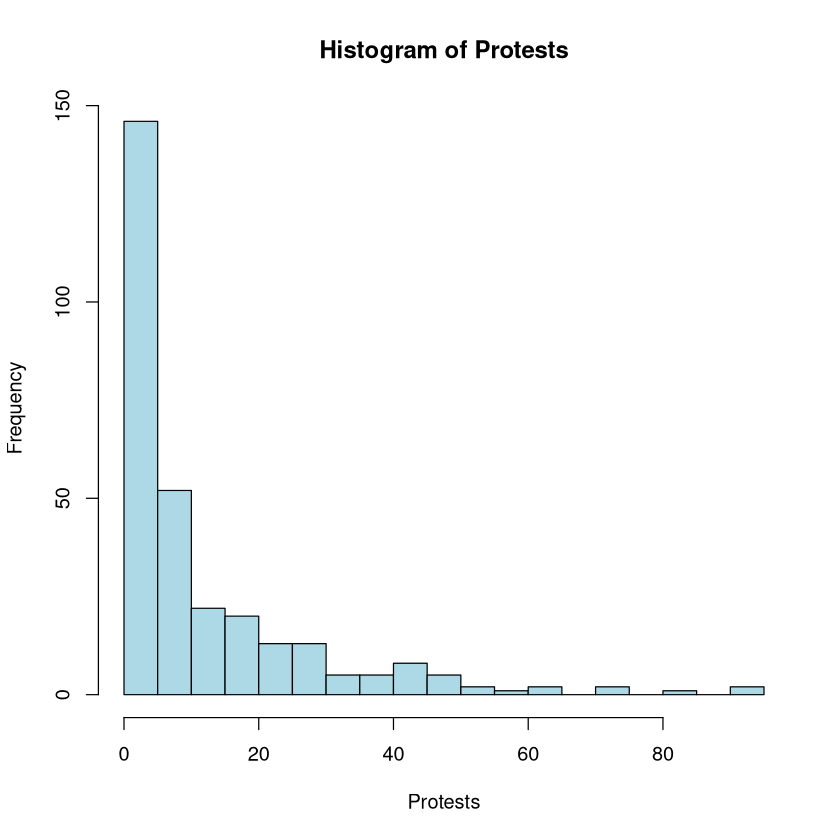

In [102]:
hist(init_data$protests, breaks = 20, main = "Histogram of Protests", xlab = "Protests", col="light blue")

In [103]:
means <- aggregate(no_na, by=list(GEO=no_na$GEO), mean)

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.defaul

In [104]:
replaceFood <- function(food, prov, means) {

    if (is.na(food)) {
        new_val <- means[means$GEO == prov, "food"]
        return(as.numeric(new_val))
    } else {
        return(as.numeric(food))
    }
}

In [105]:
init_data$food <- apply(init_data, MARGIN = 1, function(row) {replaceFood(row["food"], row["GEO"], means)})

In [106]:


init_data$manufac <- NULL


init_data$food <- NULL
# init_data <- init_data[, 1:5]


In [107]:
newMonth <- function(x) {
    if (x %in% c("December", "January", "February")) {
        return("Winter")
    } else if (x %in% c("March", "April", "May")) {
        return("Spring")
    } else if (x %in% c("June", "July", "August")) {
        return("Summer")
    } else {
        return("Fall")
    }
}

newProv <- function(x) {
    if (x %in% c("Yukon", "Nunavut", "Northwest Territories")) {
        return("Northern")
    } else {
        return(x)
    }
}

In [108]:
colnames(init_data)

[1] "year"     "month"    "GEO"      "pop"      "protests" "retail"   "oil"     
[8] "power"

In [109]:
init_data$month <- sapply(init_data$month, newMonth)
colnames(init_data)[2] <- "season"

head(init_data)

,year,season,GEO,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,Spring,Alberta,4480956,17,7989056,3983,6069621
2,2022,Spring,British Columbia,5310164,42,8959229,77433,5240902
3,2022,Spring,Manitoba,1405197,2,2083495,6290,2168371
4,2022,Spring,New Brunswick,801778,5,1340707,1818,1171958
5,2022,Spring,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,Spring,Northwest Territories,44828,0,76390,0,58889


In [110]:
standardize <- function(x, mu, std) {
    return((x-mu)/std)
}

In [111]:
colnames(init_data)[colnames(init_data) == "GEO"] <- "prov"
head(init_data)

,year,season,prov,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,Spring,Alberta,4480956,17,7989056,3983,6069621
2,2022,Spring,British Columbia,5310164,42,8959229,77433,5240902
3,2022,Spring,Manitoba,1405197,2,2083495,6290,2168371
4,2022,Spring,New Brunswick,801778,5,1340707,1818,1171958
5,2022,Spring,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,Spring,Northwest Territories,44828,0,76390,0,58889


In [112]:
init_data$prov  <- as.factor(init_data$prov)
init_data$season <- as.factor(init_data$season)
init_data$year <- as.factor(init_data$year)

In [113]:
head(init_data)

,year,season,prov,pop,protests,retail,oil,power
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>
1,2022,Spring,Alberta,4480956,17,7989056,3983,6069621
2,2022,Spring,British Columbia,5310164,42,8959229,77433,5240902
3,2022,Spring,Manitoba,1405197,2,2083495,6290,2168371
4,2022,Spring,New Brunswick,801778,5,1340707,1818,1171958
5,2022,Spring,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,Spring,Northwest Territories,44828,0,76390,0,58889


## Fitting the Model

In [114]:
init_data$pop <- sapply(init_data$pop, function(x) {standardize(x, mean(init_data$pop), sd(init_data$pop))})
init_data$retail <- sapply(init_data$retail, function(x) {standardize(x, mean(init_data$retail), sd(init_data$retail))})
init_data$power <- sapply(init_data$power, function(x) {standardize(x, mean(init_data$power), sd(init_data$power))})
init_data$oil <- sapply(init_data$oil, function(x) {standardize(x, mean(init_data$oil), sd(init_data$oil))})
# init_data$food <- sapply(init_data$food, function(x) {standardize(x, mean(init_data$food), sd(init_data$food))})

In [115]:
model1 <- glm.nb(protests ~., data=init_data, init.theta = 1)

In [116]:
summary(model1)


Call:
glm.nb(formula = protests ~ ., data = init_data, init.theta = 8.677088102, 
    link = log)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.91893    0.71143   5.509 3.62e-08 ***
year2023                       0.09195    0.07858   1.170  0.24193    
seasonSpring                  -0.05347    0.08579  -0.623  0.53310    
seasonSummer                  -0.53435    0.08791  -6.078 1.22e-09 ***
seasonWinter                  -0.18075    0.09610  -1.881  0.05999 .  
provBritish Columbia           0.85741    0.33826   2.535  0.01125 *  
provManitoba                  -2.48527    1.38933  -1.789  0.07364 .  
provNew Brunswick             -3.25743    1.62353  -2.006  0.04481 *  
provNewfoundland and Labrador -3.69438    1.73569  -2.128  0.03330 *  
provNorthwest Territories     -6.12502    1.96525  -3.117  0.00183 ** 
provNova Scotia               -3.01460    1.53652  -1.962  0.04977 *  
provNunavut                   -5.7

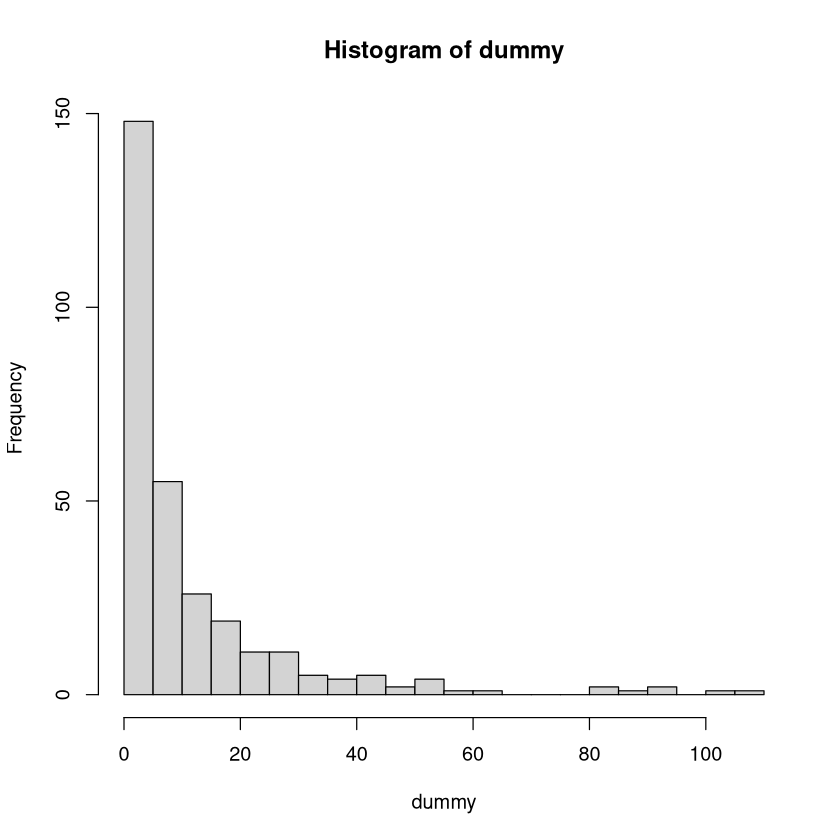

In [117]:
dummy <- rnegbin(fitted(model1), theta = 8.68)
hist(dummy, breaks=25)

In [118]:
anova(model1)

Warning message in anova.negbin(model1):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,298,2137.6259,NA
year,1,1.015006e+00,297,2136.6109,3.137065e-01
season,3,5.317336e+01,294,2083.4375,1.683786e-11
prov,12,1.726032e+03,282,357.4054,0.000000e+00
pop,1,6.481575e-03,281,357.3989,9.358331e-01
retail,1,5.170175e+00,280,352.2287,2.297790e-02
oil,1,3.935834e-01,279,351.8351,5.304218e-01
power,1,1.815668e+00,278,350.0194,1.778298e-01


In [119]:
data <- init_data[, -c(1, 4, 7, 8)]
model <- glm.nb(protests ~., data=data, init.theta = 1)

model <- step(model)
summary(model)
# names(summary(model))
# summary(model)

Start:  AIC=1583
protests ~ season + prov + retail

         Df Deviance    AIC
<none>        349.20 1583.0
- retail  1   352.33 1584.1
- season  3   397.19 1625.0
- prov   12   745.36 1955.2



Call:
glm.nb(formula = protests ~ season + prov + retail, data = data, 
    init.theta = 8.305615956, link = log)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.68364    0.50985   7.225 5.01e-13 ***
seasonSpring                  -0.06502    0.08264  -0.787 0.431441    
seasonSummer                  -0.55217    0.08629  -6.399 1.57e-10 ***
seasonWinter                  -0.22871    0.08873  -2.578 0.009946 ** 
provBritish Columbia           0.81551    0.16310   5.000 5.73e-07 ***
provManitoba                  -1.91505    0.92108  -2.079 0.037605 *  
provNew Brunswick             -2.62399    1.04409  -2.513 0.011965 *  
provNewfoundland and Labrador -3.06967    1.11340  -2.757 0.005833 ** 
provNorthwest Territories     -5.35839    1.26866  -4.224 2.40e-05 ***
provNova Scotia               -2.41344    0.99351  -2.429 0.015133 *  
provNunavut                   -4.98454    1.26290  -3.947 7.92e-05 ***
provOntario       

## Bootstrap Methods

### 1. Resampling Bootstrap

In [120]:
resampBoot <- function(df, B) {

    # Get sample size
    n <- nrow(df)
    # Initialize empty dataframe
    params <- c()
    # Initialize progress bar
    bar <- txtProgressBar(min=0, max=B, style=1)
    # Perform B iterations
    for (b in 1:B) {
        # Select a sample of size n
        indices <- sample(1:n, replace = TRUE)
        samp <- df[indices, ]
        # Fit the model with the sample
        boot_model <- glm.nb(protests ~., data=samp, init.theta = 10)
        boot_params <- coef(boot_model)
        params <- rbind(params, boot_params)
        setTxtProgressBar(bar, b)
    }
    close(bar)
    return(params)  
}

In [121]:
# boot_models <- resampBoot(data, B)
# boot_models <- as.data.frame(boot_models)
# write.csv(boot_models, "data/results/resamp_boot_results.csv")

### 2. Parametric Bootstrap

In [122]:
conditionalNegBinom <- function(theta, mu) {
    nb_sample <- rnbinom(size=theta, mu=mu, n=1)
    return(nb_sample)
}

In [123]:
paramBoot <- function(B, X, yhat, theta, func) {

    # Initialize empty vector
    params <- c()
    # Iterate B times
    for (b in 1:B) {
        # Simulate NB given means
        sim_y <- sapply(yhat, function(y) func(theta, y))
        # Add to the dataframe
        sim_data <- cbind(X, protests=sim_y)
        # Fit the model to the simulated data
        sim_model <- glm.nb(protests ~., data=sim_data, init.theta = theta)
        # Access the coefficients and store
        parameters <- coef(sim_model)
        params <- rbind(params, parameters)
    }
    return(params)
}

In [124]:
model <- glm.nb(protests ~., data=data, init.theta = 1)

theta <- summary(model)$theta
X <- data[, c(1,2,4)]
yhat <- fitted(model)

In [125]:
# parametric_results <- paramBoot(B, X, yhat, theta, func=conditionalNegBinom)
# param_results <- as.data.frame(parametric_results)
# write.csv(param_results, "data/results/param_boot_results.csv")

### 3. Error Bootstrap

In [126]:
epsilonBoot <- function(X, model, B, errors) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    # Perform B iterations
    for (b in 1:B) {
        # Get errors
        errs <- sample(errors, size=n, replace=TRUE)
        # Get fitted values
        yhat <- fitted(model)
        # Get simulated y
        ystar <- yhat + errs
        # round up negative values
        ystar <- pmax(rep(0, n), ystar)
        # Turn into DataFrame
        sim_data <- data.frame(protests=ystar, X)
        # Fit the model with the simulated data
        paramboot_model <- glm.nb(protests ~., data=sim_data, init.theta = 5)
        boot_params <- coef(paramboot_model)
        params <- rbind(params, boot_params)
    }
    return(params)
}

In [127]:
model <- glm.nb(protests ~., data=data, init.theta = 10)

In [128]:
names(summary(model))

[1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"     "theta"          "SE.theta"       "twologlik"     
[21] NA

In [129]:
summary(model)


Call:
glm.nb(formula = protests ~ ., data = data, init.theta = 8.305615979, 
    link = log)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.68364    0.50985   7.225 5.01e-13 ***
seasonSpring                  -0.06502    0.08264  -0.787 0.431441    
seasonSummer                  -0.55217    0.08629  -6.399 1.57e-10 ***
seasonWinter                  -0.22871    0.08873  -2.578 0.009946 ** 
provBritish Columbia           0.81551    0.16310   5.000 5.73e-07 ***
provManitoba                  -1.91505    0.92108  -2.079 0.037605 *  
provNew Brunswick             -2.62399    1.04409  -2.513 0.011965 *  
provNewfoundland and Labrador -3.06967    1.11340  -2.757 0.005833 ** 
provNorthwest Territories     -5.35839    1.26866  -4.224 2.40e-05 ***
provNova Scotia               -2.41344    0.99351  -2.429 0.015133 *  
provNunavut                   -4.98454    1.26290  -3.947 7.92e-05 ***
provOntario                    5.59695 

In [130]:
residuals <- residuals.glm(model, type="deviance")

In [136]:
p_resid <- quantile(residuals, probs=(1/100)*(1:100))

In [132]:
summary(model)$theta

[1] 8.305616

In [41]:
X <- data[, c(1,2,4)]
epsilon <- resid(model)
err_mean <- mean(epsilon)
err_sd <- sd(epsilon)

In [42]:
suppressWarnings({
  error_models <- epsilonBoot(X, model, B, epsilon)
})
error_results <- as.data.frame(error_models)
# write.csv(error_results, "data/results/error_boot_results.csv")

In [ ]:
var(data$retail)

[1] 1

### 3. Smooth Bootstrap

In [ ]:
addNoise <- function(X) {

    cols <- colnames(X)
    new_X <- X
    for (col in cols) {
        Xi <- X[, col]
        if (class(data[, col]) != "factor") {
            n <- length(Xi)
            S_sq <- var(Xi)
            noise_var <- S_sq / n
            new_X[, col] <- Xi + rnorm(n=n, mean=0, sd=sqrt(noise_var))
        } else {
            new_X[, col] <- Xi
        }
    }
    return(new_X)
}

In [ ]:
smoothBoot <- function(X, y, B, noisefunc) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    
    # Initialize progress bar
    pb <- txtProgressBar(min = 0, max = B, style = 3)
    
    # Perform B iterations
    for (b in 1:B) {
        # Update progress bar
        setTxtProgressBar(pb, b)
        
        # Get new dataset
        new_X <- noisefunc(X)
        new_data <- data.frame(protests=y, new_X)
        
        # Fit the model with the simulated data
        smoothboot_model <- glm.nb(protests ~., data=new_data, init.theta = 5)
        boot_params <- coef(smoothboot_model)
        params <- rbind(params, boot_params)
    }
    
    # Close progress bar
    close(pb)
    
    return(params)
}

In [ ]:
X <- data[, c(1,2,4)]
y <- data$protests


In [ ]:
# smooth_data <- smoothBoot(X, y, B, addNoise)
# smooth_results <- as.data.frame(smooth_data)
# write.csv(smooth_results, "data/results/smooth_boot_results.csv")

## Monte Carlo Prediction

### Make Predictions